In [44]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('new_data.csv').dropna(subset=['Text'])

print(len(df.index))
df['Text'].head()


91928


0    When the coworkers compliment you on how skinn...
1    Shape up this summer with @QLuxSpa! #waisttrai...
2    How to remove 400 #calories from your #diet wi...
3    Heartburn Acid Reflux &amp; GERD Diet Cure Wit...
4    David Zinczenko - the "Abs Diet" and "Zero Bel...
Name: Text, dtype: object

In [46]:
import preprocessor as p

df['clean_text'] = df['Text'].apply(lambda text: p.clean(str(text)))

df['clean_text'].head()

0    When the coworkers compliment you on how skinn...
1                          Shape up this summer with !
2              How to remove from your without effort?
3    Heartburn Acid Reflux &amp; GERD Diet Cure Wit...
4    David Zinczenko - the "Abs Diet" and "Zero Bel...
Name: clean_text, dtype: object

In [47]:
df.sort_values("Text", inplace = True)
# dropping ALL duplicte values
df.drop_duplicates(subset ="Text",keep = False, inplace = True)

In [48]:
df['clean_text'] = df['clean_text'].apply(lambda text: text.lower())

df['clean_text'].head()

34046                                     !dile a la ! ...
20327    " eating good , looking good , feeling good an...
84720            " fat kat, they call tht bitch garfield "
63664    " how are you going to exercise that decree wi...
53235      " i exercise at length so electrify the fence."
Name: clean_text, dtype: object

In [49]:
import re

def remove_contractions(text):
    text = re.sub(r'’', '\'', text)
    
    text = re.sub(r'won\'t', 'will not', text)
    text = re.sub(r'can\'t', 'can not', text)
    
    text = re.sub(r'\'s', ' is', text)
    text = re.sub(r'\'m', ' am', text)
    text = re.sub(r'\'re', ' are', text)
    text = re.sub(r'\'ve', ' have', text)
    text = re.sub(r'\'ll', ' will', text)
    text = re.sub(r'\'d', ' would', text)
    text = re.sub(r'\'t', ' not', text)
    text = re.sub(r'n\'t', ' not', text)
    
    return text

df['clean_text'] = df['clean_text'].apply(remove_contractions)

df['clean_text'].head()

34046                                     !dile a la ! ...
20327    " eating good , looking good , feeling good an...
84720            " fat kat, they call tht bitch garfield "
63664    " how are you going to exercise that decree wi...
53235      " i exercise at length so electrify the fence."
Name: clean_text, dtype: object

In [50]:
df['clean_text'] = df['clean_text'].str.replace('[^\w\s]', '')

df['clean_text'].head()

34046                                          dile a la  
20327     eating good  looking good  feeling good and i...
84720                fat kat they call tht bitch garfield 
63664     how are you going to exercise that decree win...
53235          i exercise at length so electrify the fence
Name: clean_text, dtype: object

In [51]:
# Remove whitespaces.

df['clean_text'] = df['clean_text'].apply(lambda text: str(text).strip())

df['clean_text'].head()

34046                                            dile a la
20327    eating good  looking good  feeling good and it...
84720                 fat kat they call tht bitch garfield
63664    how are you going to exercise that decree wine...
53235          i exercise at length so electrify the fence
Name: clean_text, dtype: object

In [52]:
# Remove empty texts.

df = df.drop(df[df['clean_text'] == ''].index)

print(len(df.index))
df['clean_text'].head()

65003


34046                                            dile a la
20327    eating good  looking good  feeling good and it...
84720                 fat kat they call tht bitch garfield
63664    how are you going to exercise that decree wine...
53235          i exercise at length so electrify the fence
Name: clean_text, dtype: object

In [53]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\panka\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [54]:
# Remove non-English words.
from nltk.corpus import words
words = set(words.words())

df['clean_text'] = df['clean_text'].apply(lambda text: ' '.join(word for word in text.split() if word in words))

df['clean_text'].head()

34046                                                 a la
20327    eating good looking good feeling good and it i...
84720                              fat kat they call bitch
63664    how are you going to exercise that decree wine...
53235          i exercise at length so electrify the fence
Name: clean_text, dtype: object

In [55]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [56]:
def sent_to_words(sentences):
   for sentence in sentences:
      yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data_words = list(sent_to_words(df['clean_text']))

In [57]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

2023-04-10 15:16:18,785 : INFO : collecting all words and their counts
2023-04-10 15:16:18,786 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2023-04-10 15:16:18,882 : INFO : PROGRESS: at sentence #10000, processed 83770 words and 36275 word types
2023-04-10 15:16:18,993 : INFO : PROGRESS: at sentence #20000, processed 175422 words and 69003 word types
2023-04-10 15:16:19,095 : INFO : PROGRESS: at sentence #30000, processed 259357 words and 90465 word types
2023-04-10 15:16:19,209 : INFO : PROGRESS: at sentence #40000, processed 353620 words and 112028 word types
2023-04-10 15:16:19,353 : INFO : PROGRESS: at sentence #50000, processed 445085 words and 129724 word types
2023-04-10 15:16:19,525 : INFO : PROGRESS: at sentence #60000, processed 541288 words and 146557 word types
2023-04-10 15:16:19,577 : INFO : collected 154373 token types (unigram + bigrams) from a corpus of 583791 words and 65003 sentences
2023-04-10 15:16:19,578 : INFO : merged Phrases<154373 voca

In [58]:
def remove_stopwords(texts):
   return [[word for word in simple_preprocess(str(doc)) 
   if word not in stop_words] for doc in texts]
def make_bigrams(texts):
   return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
   return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
   texts_out = []
   for sent in texts:
      doc = nlp(" ".join(sent))
      texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
   return texts_out

In [59]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [60]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

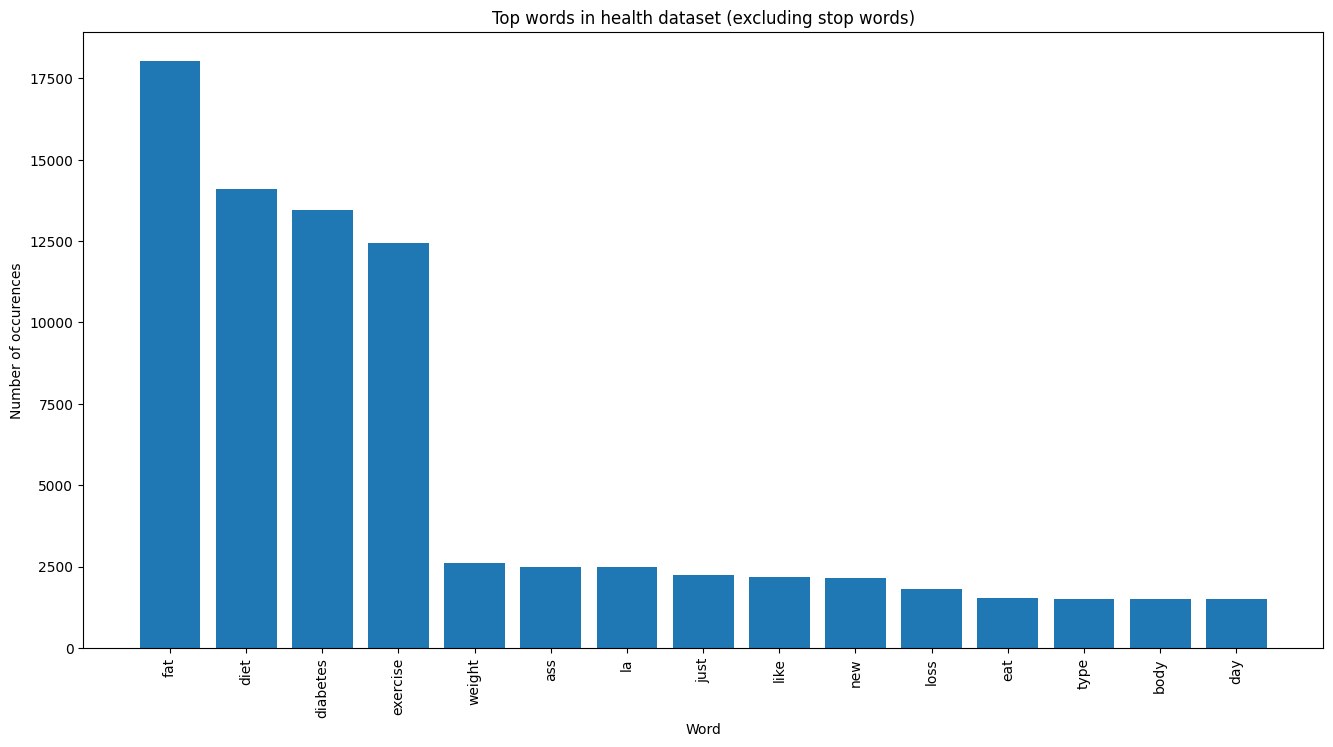

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['clean_text'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in health dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [62]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

2023-04-10 15:25:23,231 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2023-04-10 15:25:23,327 : INFO : adding document #10000 to Dictionary<4497 unique tokens: ['discipline', 'eat', 'energy', 'feel', 'good']...>
2023-04-10 15:25:23,411 : INFO : adding document #20000 to Dictionary<6743 unique tokens: ['discipline', 'eat', 'energy', 'feel', 'good']...>
2023-04-10 15:25:23,496 : INFO : adding document #30000 to Dictionary<7968 unique tokens: ['discipline', 'eat', 'energy', 'feel', 'good']...>
2023-04-10 15:25:23,581 : INFO : adding document #40000 to Dictionary<8936 unique tokens: ['discipline', 'eat', 'energy', 'feel', 'good']...>
2023-04-10 15:25:23,665 : INFO : adding document #50000 to Dictionary<9776 unique tokens: ['discipline', 'eat', 'energy', 'feel', 'good']...>
2023-04-10 15:25:23,748 : INFO : adding document #60000 to Dictionary<10478 unique tokens: ['discipline', 'eat', 'energy', 'feel', 'good']...>
2023-04-10 15:25:23,792 : INFO : built Dictionary<10740 uniq

TF-IDF

In [64]:
from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

2023-04-10 15:25:41,670 : INFO : collecting document frequencies
2023-04-10 15:25:41,672 : INFO : PROGRESS: processing document #0
2023-04-10 15:25:41,687 : INFO : PROGRESS: processing document #10000
2023-04-10 15:25:41,698 : INFO : PROGRESS: processing document #20000
2023-04-10 15:25:41,710 : INFO : PROGRESS: processing document #30000
2023-04-10 15:25:41,722 : INFO : PROGRESS: processing document #40000
2023-04-10 15:25:41,732 : INFO : PROGRESS: processing document #50000
2023-04-10 15:25:41,743 : INFO : PROGRESS: processing document #60000
2023-04-10 15:25:41,792 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 65003 documents and 10740 features (264780 matrix non-zeros)', 'datetime': '2023-04-10T15:25:41.792750', 'gensim': '4.3.1', 'python': '3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'initialize'}


[]


In [65]:
ldamallet = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf, num_topics=20, id2word=id2word, chunksize=100)

2023-04-10 15:25:47,927 : INFO : using symmetric alpha at 0.05
2023-04-10 15:25:47,929 : INFO : using symmetric eta at 0.05
2023-04-10 15:25:47,931 : INFO : using serial LDA version on this node
2023-04-10 15:25:47,960 : INFO : running online (single-pass) LDA training, 20 topics, 1 passes over the supplied corpus of 65003 documents, updating model once every 100 documents, evaluating perplexity every 1000 documents, iterating 50x with a convergence threshold of 0.001000
2023-04-10 15:25:47,963 : INFO : PROGRESS: pass 0, at document #100/65003
2023-04-10 15:25:48,013 : INFO : merging changes from 100 documents into a model of 65003 documents
2023-04-10 15:25:48,068 : INFO : topic #2 (0.050): 0.117*"president" + 0.101*"foolish" + 0.082*"cleanup" + 0.075*"clause" + 0.072*"dead" + 0.068*"weed" + 0.060*"chip" + 0.059*"bag" + 0.058*"guy" + 0.043*"see"
2023-04-10 15:25:48,069 : INFO : topic #14 (0.050): 0.309*"diabetes" + 0.059*"length" + 0.055*"vacation" + 0.048*"fence" + 0.045*"travel" + 0

In [66]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

2023-04-10 15:27:17,808 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows


[(9,
  [('inspiring', 9.310986e-05),
   ('twee', 9.310986e-05),
   ('fortunately', 9.310986e-05),
   ('aromatic', 9.310986e-05),
   ('healthful', 9.310986e-05),
   ('virgin', 9.310986e-05),
   ('macular', 9.310986e-05),
   ('retina', 9.310986e-05),
   ('commencement', 9.310986e-05),
   ('penetrate', 9.310986e-05)]),
 (10,
  [('cure', 0.17727585),
   ('right', 0.16380532),
   ('study', 0.07163204),
   ('heart_disease', 0.050605994),
   ('share', 0.029735358),
   ('combination', 0.0016931427),
   ('deadly_combination', 4.712214e-05),
   ('ass', 4.710619e-05),
   ('natural', 4.7098358e-05),
   ('herbal', 4.7088964e-05)]),
 (0,
  [('man', 0.15112655),
   ('try', 0.12931883),
   ('healthy', 0.1059481),
   ('keep', 0.08745807),
   ('thing', 0.07712285),
   ('daily', 0.058899842),
   ('thick', 0.052545715),
   ('pussy', 0.03483231),
   ('exercise', 0.031041704),
   ('ass', 2.5340389e-05)]),
 (19,
  [('good', 0.12675467),
   ('need', 0.124532275),
   ('body', 0.101948544),
   ('fitness', 0.092

2023-04-10 15:27:27,627 : INFO : 7 accumulators retrieved from output queue
2023-04-10 15:27:27,725 : INFO : accumulated word occurrence stats for 65003 virtual documents



Coherence Score:  0.42063147487419483


In [67]:
#How to find the optimal number of topics for LDA?
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [73]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus_tfidf, texts=data_lemmatized, start=2, limit=300, step=5)

2023-04-10 15:37:22,476 : INFO : using symmetric alpha at 0.5
2023-04-10 15:37:22,477 : INFO : using symmetric eta at 0.5
2023-04-10 15:37:22,480 : INFO : using serial LDA version on this node
2023-04-10 15:37:22,484 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 65003 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2023-04-10 15:37:22,527 : INFO : PROGRESS: pass 0, at document #2000/65003
2023-04-10 15:37:23,204 : INFO : merging changes from 2000 documents into a model of 65003 documents
2023-04-10 15:37:23,207 : INFO : topic #0 (0.500): 0.014*"diabete" + 0.014*"fat" + 0.011*"diabetes" + 0.011*"new" + 0.011*"exercise" + 0.009*"diet" + 0.008*"version" + 0.007*"beer_gut" + 0.006*"odd_second" + 0.006*"lose"
2023-04-10 15:37:23,208 : INFO : topic #1 (0.500): 0.033*"diabetes" + 0.030*"diabete" + 0.019*"exercise" + 0.017*"diet" + 0.015*

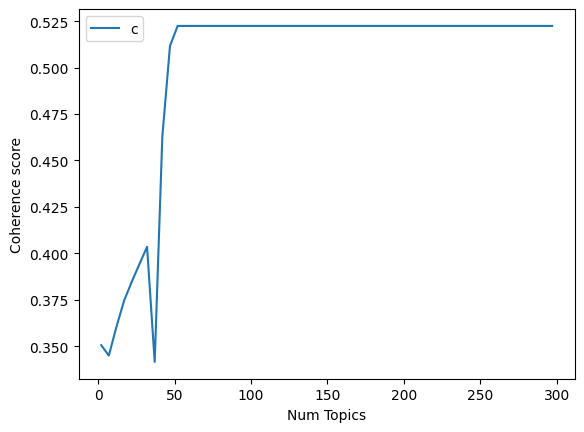

In [75]:
# Show graph
limit=300; start=2; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [76]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3506
Num Topics = 7  has Coherence Value of 0.345
Num Topics = 12  has Coherence Value of 0.3605
Num Topics = 17  has Coherence Value of 0.3746
Num Topics = 22  has Coherence Value of 0.3847
Num Topics = 27  has Coherence Value of 0.3942
Num Topics = 32  has Coherence Value of 0.4035
Num Topics = 37  has Coherence Value of 0.3415
Num Topics = 42  has Coherence Value of 0.4629
Num Topics = 47  has Coherence Value of 0.5116
Num Topics = 52  has Coherence Value of 0.5224
Num Topics = 57  has Coherence Value of 0.5224
Num Topics = 62  has Coherence Value of 0.5224
Num Topics = 67  has Coherence Value of 0.5224
Num Topics = 72  has Coherence Value of 0.5224
Num Topics = 77  has Coherence Value of 0.5224
Num Topics = 82  has Coherence Value of 0.5224
Num Topics = 87  has Coherence Value of 0.5224
Num Topics = 92  has Coherence Value of 0.5224
Num Topics = 97  has Coherence Value of 0.5224
Num Topics = 102  has Coherence Value of 0.5224
Num Topics = 10

In [ ]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

2023-04-10 15:36:53,104 : INFO : topic #0 (0.059): 0.049*"workout" + 0.048*"fitness" + 0.039*"man" + 0.033*"girl" + 0.029*"fat" + 0.028*"low" + 0.028*"head" + 0.025*"high" + 0.024*"exercise" + 0.021*"free"
2023-04-10 15:36:53,106 : INFO : topic #1 (0.059): 0.061*"much" + 0.060*"go" + 0.048*"doctor" + 0.039*"read" + 0.033*"sport" + 0.029*"see" + 0.024*"short" + 0.020*"join" + 0.019*"people" + 0.019*"enough"
2023-04-10 15:36:53,108 : INFO : topic #2 (0.059): 0.139*"exercise" + 0.026*"pack" + 0.025*"breakthrough" + 0.025*"great" + 0.024*"inch_outdoor" + 0.023*"belt_bag" + 0.023*"running_waist" + 0.023*"world" + 0.020*"sugar" + 0.019*"bee"
2023-04-10 15:36:53,109 : INFO : topic #3 (0.059): 0.071*"food" + 0.057*"start" + 0.039*"exercise" + 0.036*"always" + 0.034*"energy" + 0.032*"cleanup" + 0.027*"keep" + 0.027*"try" + 0.023*"diet" + 0.020*"insulin"
2023-04-10 15:36:53,110 : INFO : topic #4 (0.059): 0.181*"diabete" + 0.059*"type" + 0.049*"week" + 0.032*"walk" + 0.031*"work" + 0.029*"cure" +

[(0,
  '0.049*"workout" + 0.048*"fitness" + 0.039*"man" + 0.033*"girl" + '
  '0.029*"fat" + 0.028*"low" + 0.028*"head" + 0.025*"high" + 0.024*"exercise" '
  '+ 0.021*"free"'),
 (1,
  '0.061*"much" + 0.060*"go" + 0.048*"doctor" + 0.039*"read" + 0.033*"sport" + '
  '0.029*"see" + 0.024*"short" + 0.020*"join" + 0.019*"people" + '
  '0.019*"enough"'),
 (2,
  '0.139*"exercise" + 0.026*"pack" + 0.025*"breakthrough" + 0.025*"great" + '
  '0.024*"inch_outdoor" + 0.023*"belt_bag" + 0.023*"running_waist" + '
  '0.023*"world" + 0.020*"sugar" + 0.019*"bee"'),
 (3,
  '0.071*"food" + 0.057*"start" + 0.039*"exercise" + 0.036*"always" + '
  '0.034*"energy" + 0.032*"cleanup" + 0.027*"keep" + 0.027*"try" + '
  '0.023*"diet" + 0.020*"insulin"'),
 (4,
  '0.181*"diabete" + 0.059*"type" + 0.049*"week" + 0.032*"walk" + 0.031*"work" '
  '+ 0.029*"cure" + 0.024*"risk" + 0.022*"next" + 0.020*"nice" + 0.016*"diet"'),
 (5,
  '0.077*"version" + 0.073*"new" + 0.044*"exercise" + 0.041*"really" + '
  '0.039*"late" + 